## solving a very critical problem of Childbed fever in Europe by analyzing past data and emphasizing on the importance of handwashing before treating patients.

This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about childbed fever: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and wash their hands!



In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
monthly_deaths=pd.read_csv("monthly_deaths.csv")
# monthly_deaths.set_index("date",inplace=True)

In [9]:
monthly_deaths

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


Mortality_Rate=The number of deaths in a given area or period, or from a particular cause.

Calculating motality rate month wise 

In [10]:
avgs=[]
for i in monthly_deaths.values:
    
    avg=100*i[2]/i[1]
    avgs.append(avg)

In [11]:
monthly_deaths["mortalityRate"]=avgs

In [12]:
Years=monthly_deaths["date"].str.split("-",expand=True)[0]

In [13]:
monthly_deaths["year"]=Years

In [14]:
monthly_deaths

,date,births,deaths,mortalityRate,year
0,1841-01-01,254,37,14.566929,1841
1,1841-02-01,239,18,7.531381,1841
2,1841-03-01,277,12,4.332130,1841
3,1841-04-01,255,4,1.568627,1841
4,1841-05-01,255,2,0.784314,1841
...,...,...,...,...,...
93,1848-11-01,310,9,2.903226,1848
94,1848-12-01,373,5,1.340483,1848
95,1849-01-01,403,9,2.233251,1849
96,1849-02-01,389,12,3.084833,1849


Describing data generally

In [15]:
monthly_deaths.describe()

,births,deaths,mortalityRate
count,98.000000,98.000000,98.000000
mean,267.000000,22.469388,8.620258
std,41.769372,18.141031,7.181766
min,190.000000,0.000000,0.000000
25%,242.500000,8.000000,2.910020
50%,264.000000,16.500000,6.221076
75%,292.750000,36.750000,13.318452
max,406.000000,75.000000,31.380753


In [197]:
v=dict()
for j in monthly_deaths.values:
    a=j[-1]
    if a in v:
        v[a].append(sum([j[2]/j[1]]))
    else:
        v[a]=[(j[2]/j[1])]
            

In [198]:
a=[]
for i in v.values():
    a.append(sum(i)*100)
a

[79.00385992450069,
 212.16977973704337,
 106.73637442944155,
 106.00277774754198,
 89.08076425172867,
 166.12711462667,
 60.53087732621039,
 14.889553100275476,
 10.24419189961595]

In [18]:
uni=monthly_deaths["year"].unique()

In [19]:
avg_deaths=pd.DataFrame(a)
avg_deaths["years"]=uni

In [20]:
avg_deaths.columns=["mortalityrate","years"]

In [21]:
avg_deaths.set_index("years",inplace=True)

In [22]:
avg_deaths

,mortalityrate
years,
1841,79.003860
1842,212.169780
1843,106.736374
1844,106.002778
1845,89.080764
1846,166.127115
1847,60.530877
1848,14.889553
1849,10.244192


Plotting Line Chart for seeing the deaths correctly and analyzing it clearly

Text(0, 0.5, 'Mortality rate')

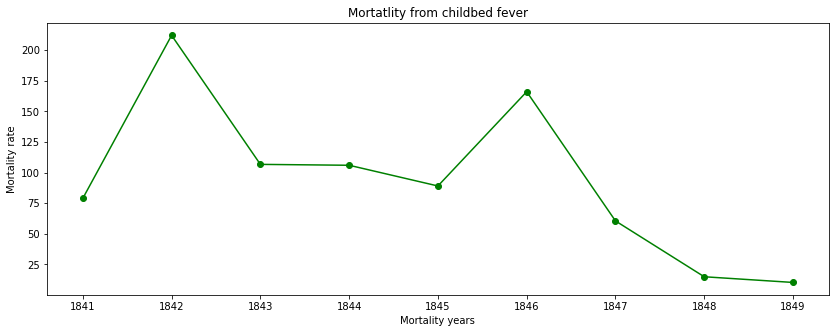

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.plot(avg_deaths.mortalityrate,color="green",marker="o")
plt.title("Mortatlity from childbed fever")
plt.xlabel("Mortality years")
plt.ylabel("Mortality rate")


In [25]:
#Checking the distribution of data 

In [194]:
#Coeffe of skewness
def skew(col):
    me=0
    count=0
    for i in avg_deaths[col]:
        me+=i
        count+=1
        mean=me//count
        numerator=3*(mean-medi)
        S=numerator/standarddevi
    return S
    
    
skew("mortalityrate")

0.18004996670497742

In [45]:
medi=avg_deaths["mortalityrate"].median()

In [47]:
standarddevi=avg_deaths["mortalityrate"].std()

In [55]:
# if S>0 the dist is positively skewed(means on right side )
S

0.18004996670497742

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


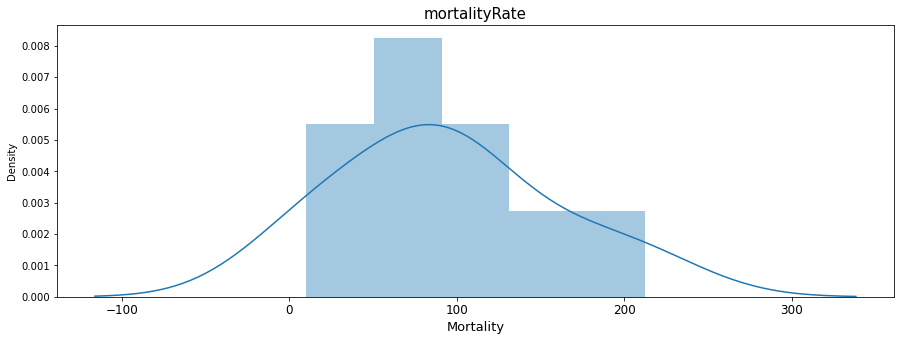

In [62]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.distplot(avg_deaths["mortalityrate"])

ax.set_title('mortalityRate', fontsize = 15, loc='center')
ax.set_xlabel('Mortality', fontsize = 13)
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left()
#it is slightly Skewed as just having a diff of .18 
#Most of the data lye between 100 to 200 deaths in 9 years 

In [113]:
rate=[]
for i in avg_deaths["mortalityrate"]:
    rate.append(int(i))
rate=pd.Series(rate)

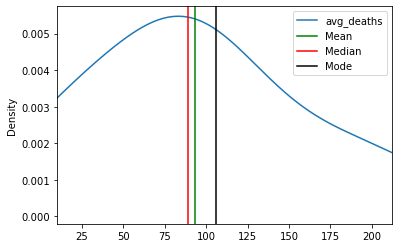

In [138]:
#by matplotlib
rate.plot.kde(xlim = (rate.min(),rate.max()),label = "avg_deaths")

plt.axvline(rate.mean(), color = "green",label="Mean")
plt.axvline(rate.median(), color = "red",label="Median")
plt.axvline(rate.mode().mean(), color = "black",label="Mode")

plt.legend()
plt.show()

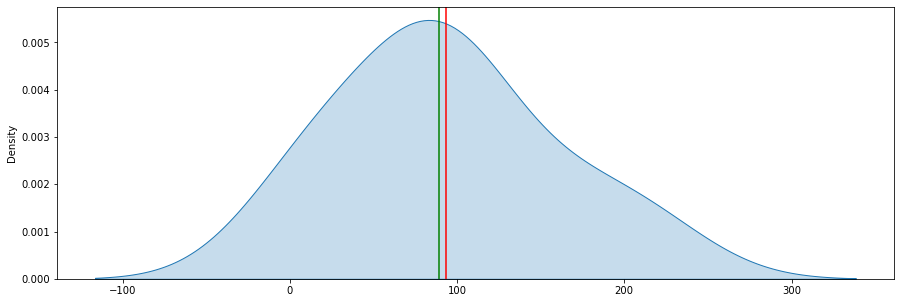

In [140]:
#Checking multiple graphs for confirming that the dist is true
fig, ax = plt.subplots(figsize=(15, 5))
sns.kdeplot(rate, shade=True)
plt.axvline(x=rate.mean(),
            color='red')
plt.axvline(x=rate.median(),
            color='green')



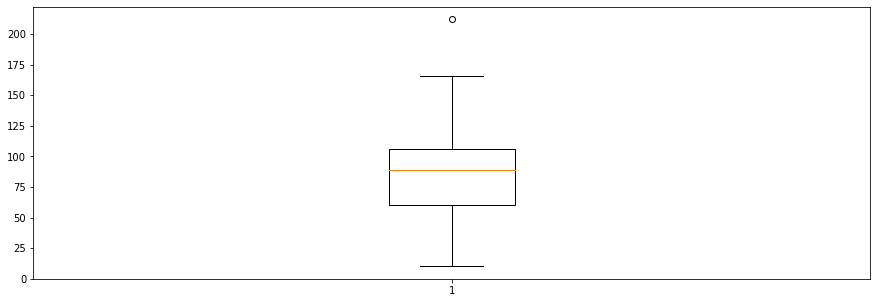

In [144]:
#The line shows median and whisker shows the min and max data and the box shows major data 
fig, ax = plt.subplots(figsize=(15, 5))
plt.boxplot(rate)
plt.show()

In [169]:
# calculating coeffe of Variation checking which year is worse
month_std=monthly_deaths.groupby("year")["deaths"].std()
month_mean=monthly_deaths.groupby("year")["deaths"].mean()

In [170]:
#Creating DATAfRAME
cov=pd.DataFrame()

In [171]:
cov["MonthMean"]=month_mean

In [172]:
cov["Monthstd"]=month_std

In [173]:
cov

,MonthMean,Monthstd
year,,
1841,16.818182,16.160558
1842,43.416667,20.734067
1843,22.833333,17.585290
1844,21.666667,14.189198
1845,20.083333,9.709024
1846,38.250000,10.225858
1847,14.666667,15.784534
1848,3.750000,3.333712
1849,13.666667,5.686241


In [176]:
cv=[]
for i in cov.values:
    c_v=(i[1]/i[0])*100
    cv.append(c_v)

In [178]:
cov["Coeffe of Variation"]=cv

In [179]:
cov

,MonthMean,Monthstd,Coeffe of Variation
year,,,
1841,16.818182,16.160558,96.089805
1842,43.416667,20.734067,47.756007
1843,22.833333,17.585290,77.015869
1844,21.666667,14.189198,65.488605
1845,20.083333,9.709024,48.343689
1846,38.250000,10.225858,26.734271
1847,14.666667,15.784534,107.621823
1848,3.750000,3.333712,88.898989
1849,13.666667,5.686241,41.606639
